# Tarea 1.1 Regresiones
## Iker Bali Elizalde A01656437

In [54]:
# importo librerías

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from sklearn import linear_model

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

plt.style.use("dark_background")

# importo los datos

datos=pd.read_csv("Rer_multiple1 - Sheet1.csv")
datos



,Precios,Gast_pub,Ventas
0,91,3.9,110
1,82,4.9,170
2,71,7.6,260
3,78,6.8,240
4,82,5.9,230
5,73,9.1,290
6,96,3.4,150
7,76,11.6,320
8,69,14.1,330
9,66,14.9,310


# a) El nivel de ventas en función de los precios

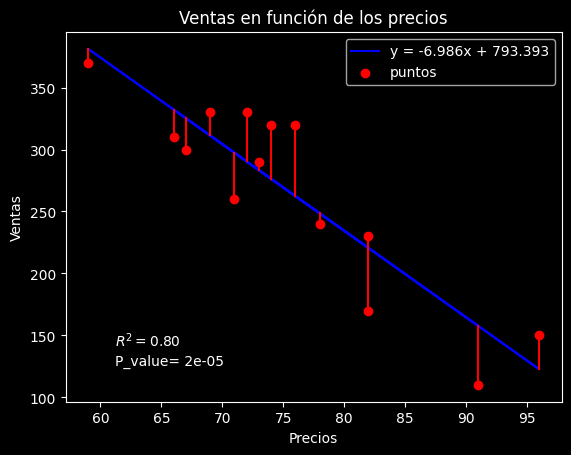

In [55]:

x=datos["Precios"]
y=datos["Ventas"]

# Análisis

m, b, r_value, p_value, std_err = stats.linregress(x, y)
yest=m*x+b
plt.figure()
plt.title("Ventas en función de los precios")
plt.xlabel("Precios")
plt.ylabel("Ventas")
plt.plot(x,yest,color="blue",label=("y = "+ str(round(m,3))+ "x + "+ str(round(b,3))))
plt.scatter(x,y,color="red",label="puntos")
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], yest[i]], color="red")
r2=r_value**2
plt.text(0.1, 0.1, "P_value= " + str(round(p_value,5)), transform=plt.gca().transAxes,color="white")
plt.text(0.1, 0.15, r'$R^2 = {:.2f}$'.format(r2), transform=plt.gca().transAxes,color="white")
plt.legend()
plt.show()

### Ecuación de Regresión : Ventas=-6.986*Precios + 793.393

Al observar el p-value, el cual es de 0.00002 , y compararlo con el nivel de significancia de $\alpha=0.05$, se puede observar que mi p-value es menor a $\alpha$, entonces esto significa que la regresión es muy buena 

# b) El nivel de ventas en función de la publicidad

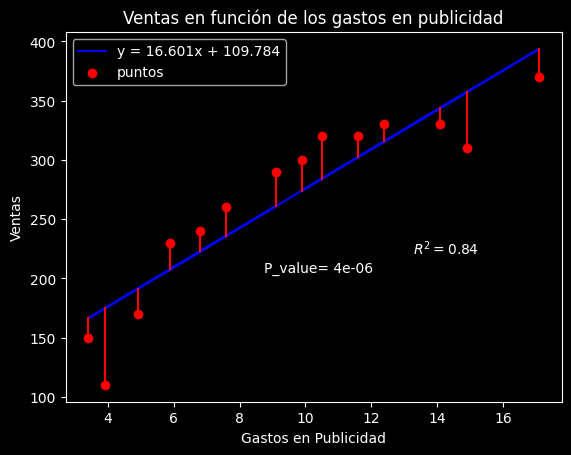

In [56]:

x2=datos["Gast_pub"]
y=datos["Ventas"]

# Análisis

m, b, r_value, p_value, std_err = stats.linregress(x2, y)
yest=m*x2+b
dify=np.abs(yest-y)
zeros=np.zeros(len(x))
plt.figure()
plt.title("Ventas en función de los gastos en publicidad")
plt.xlabel("Gastos en Publicidad")
plt.ylabel("Ventas")
plt.plot(x2,yest,color="blue",label=("y = "+ str(round(m,3))+ "x + "+ str(round(b,3))))
plt.scatter(x2,y,color="red",label="puntos")
for i in range(len(x2)):
    plt.plot([x2[i], x2[i]], [y[i], yest[i]], color="red")
r2=r_value**2
plt.text(0.4, 0.35, "P_value= " + str(round(p_value,6)), transform=plt.gca().transAxes,color="white")
plt.text(0.7, 0.4, r'$R^2 = {:.2f}$'.format(r2), transform=plt.gca().transAxes,color="white")
plt.legend()
plt.show()

### Ecuación de Regresión : Ventas=16.601*Gastos en Publicidad + 109.784

Al observar el p-value, el cual es de 0.000004 , y compararlo con el nivel de significancia de $\alpha=0.05$, se puede observar que mi p-value es menor a $\alpha$, entonces esto significa que la regresión es muy buena también, sin embargo, al comparar ambas regresiones , se puede observar que el p-value es menor en la relación Ventas-Publicidad, por lo que se puede concluir que este es un mejor modelo a comparación del otro, aunque ambos son buenos , este es mejor po este aspecto.

# c) Regresión Múltiple

In [57]:

model = ols("Ventas ~ Precios + Gast_pub", datos).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()


                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     37.28
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.26e-05
Time:                        20:06:08   Log-Likelihood:                -65.840
No. Observations:                  14   AIC:                             137.7
Df Residuals:                      11   BIC:                             139.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    397.6098    171.701      2.316      0.0

c:\Users\IKER\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Entonces la ecuación quedaría como:

$ Ventas = -3.0374 * Precios + 10.3782 * Publicidad + 397.6098 $


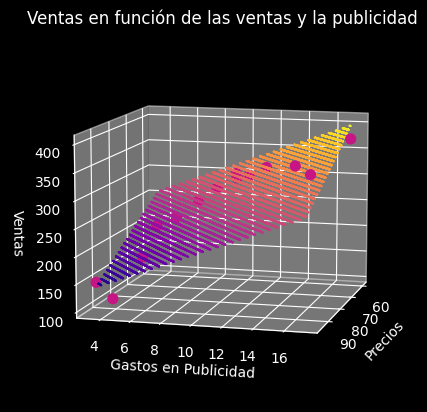

In [58]:

# creo mi malla de datos

Xg, Yg = np.meshgrid(x, x2)

# genero mi función z(x,y)
Zg = -3.0374*Xg+ 10.3782*Yg  + 397.6098

# Crear una figura y un eje
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(Xg,Yg,Zg,levels=50,cmap="plasma",linestyles='solid')
#ax.plot_surface(Xg, Yg, Zg,cmap="Blues",alpha=0.1)
ax.scatter(x, x2, y, c='mediumvioletred',marker="o",alpha=1,s=50)
# Etiquetas de los ejes
ax.set_xlabel('Precios')
ax.set_ylabel('Gastos en Publicidad')
ax.set_zlabel('Ventas')
ax.view_init(elev=10, azim=15)
# Título
plt.title("Ventas en función de las ventas y la publicidad")
plt.show()


Respecto a si es buena o no la regresión,al observar su R-Squared ajustado es de 0.848, es decir que las variables dependientes e independientes  están correlacionadas de gran manera, lo cual nos hace darnos cuenta que es un buen ajuste para un modelo.

Además de que su p-value sea de 1.26e-05 nos hace darnos cuenta que, como en los modelos anteriores, mi regresión sigue siendo buena pues pasa su prueba de ajuste.